# Support Vector Machine vs Vanilla Linear Classifier
- logistic regression and SVM
- multiclass applications
- multinomial - softmax

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
import seaborn as sns
# from sklean.preprocessing import Stan

In [14]:
digits = datasets.load_digits()

In [28]:
target=digits.target
flatten_digits = digits.images.reshape((len(digits.images),-1))

# visualize some handwritten images in the dataset

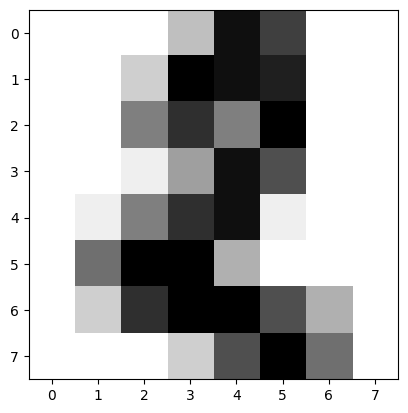

In [39]:
plt.imshow(digits.images[2],cmap=plt.cm.gray_r, interpolation='nearest')

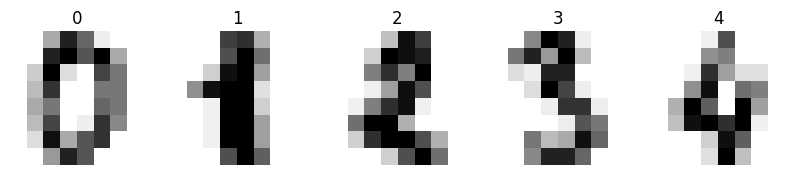

In [41]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(flatten_digits,target,test_size=0.2)

In [45]:
## classification with logistic regression 

In [47]:
scaler=StandardScaler()
xtrain_logistic = scaler.fit_transform(xtrain)
xtest_logistic = scaler.fit_transform(xtest)

In [51]:
logit = LogisticRegression(C=0.01, penalty='l1',solver='saga',tol=0.1, multi_class='multinomial')

In [55]:
logit.fit(xtrain_logistic,ytrain)

D:\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

In [59]:
y_pred_logistic = logit.predict(xtest_logistic)

In [63]:
print("Accuracy: "+str(logit.score(xtest_logistic, ytest)))

Accuracy: 0.8166666666666667


In [67]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(ytest, y_pred_logistic, labels=label_names)

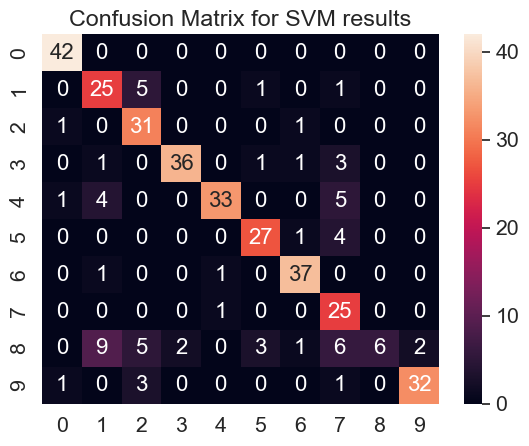

In [73]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

# Classification with SVM

In [80]:
svm_classifier=svm.SVC(gamma='scale')

In [84]:
svm_classifier.fit(xtrain,ytrain)

SVC()

In [86]:
y_pred_Svm=svm_classifier.predict(xtest)

In [88]:
print(f'accuracy {accuracy_score(y_pred_Svm,ytest)}')

accuracy 0.9916666666666667


In [92]:
label_names=[0,1,2,3,4,5,6,7,8,9]
cmx=confusion_matrix(ytest,y_pred_Svm,labels=label_names)
cmx

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 36]], dtype=int64)

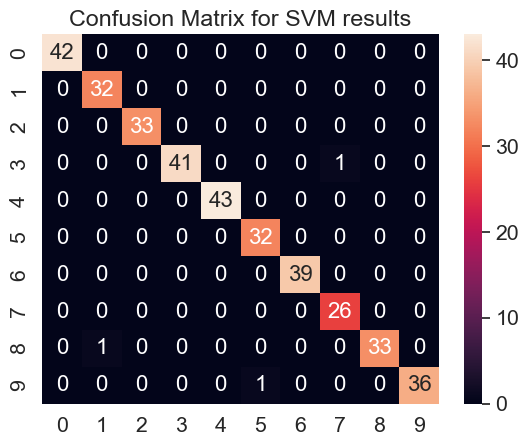

In [94]:
df_cm=pd.DataFrame(cmx)
sns.heatmap(df_cm,annot=True,annot_kws={'size':16})
plt.title(title)
plt.show()

# comparing both SVM and Logistic Regression with K-fold Cross Validation

In [103]:
algorithm=[]
algorithm.append(('SVM', svm_classifier))
algorithm.append(('Logistic_L1', logit))
algorithm.append(('Logistic_L2', LogisticRegression(C=0.01, penalty='l2', solver='saga', tol=0.1, multi_class='multinomial')))


In [111]:
results=[]
names=[]
y=digits.target

for name,algo in algorithm:
    k_fold=model_selection.KFold(n_splits=10)
    if name == 'SVM':
        x=flatten_digits
        cv_results=model_selection.cross_val_score(algo,x,y,cv=k_fold,scoring='accuracy')

    else:
        scaler=StandardScaler()
        x=scaler.fit_transform(flatten_digits)
        cv_results=model_selection.cross_val_score(algo,x,y,cv=k_fold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
        

D:\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\anaconda\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

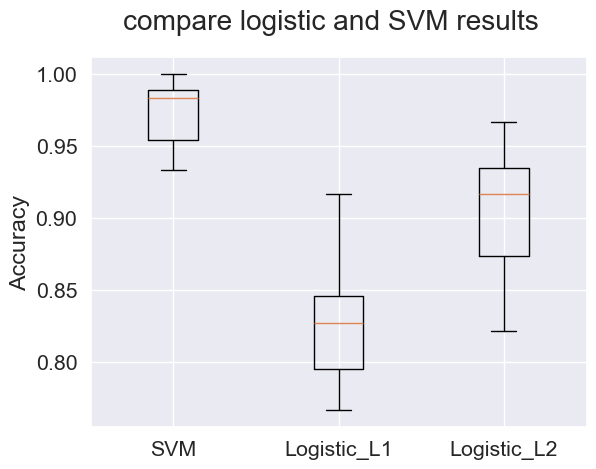

In [115]:
fig=plt.figure()
fig.suptitle('compare logistic and SVM results')
ax=fig.add_subplot()
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()